In [1]:
%pylab inline
import os
import sys

module_path = os.path.abspath(os.path.join('./src/'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import weights
import tracers_properties
from pygadgetreader import *
import soda

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [2]:
pp= readsnap('./halos/LMC6_6.25M_vir_000', 'pos', 'dm')
vv= readsnap('./halos/LMC6_6.25M_vir_000', 'vel', 'dm')

massarr= readsnap('./halos/LMC6_6.25M_vir_000', 'mass', 'dm')
Epp = readsnap('./halos/LMC6_6.25M_vir_000', 'pot', 'dm')
ids = readsnap('./halos/LMC6_6.25M_vir_000', 'pid', 'dm')
rr=np.sqrt(pp[:,0]**2+pp[:,1]**2+pp[:,2]**2)


r_cut = index = np.where(rr<50)[0]

pp = pp[r_cut]
rr = rr[r_cut]
vv = vv[r_cut]

massarr = massarr[r_cut]
Epp = Epp[r_cut]
ids = ids[r_cut]

Returning DM    Positions
Returning DM    Velocities
Returning DM    Mass
Returning DM    Potential
Returning DM    Particle IDs


In [3]:
partmass=massarr[3]*1e10 #generated the halo particles as "bulge"-type in Gadget file
a=0.5
v2=vv[:,0]**2+vv[:,1]**2+vv[:,2]**2
Ekk=0.5*v2



In [4]:
r_profiles = np.linspace(1, 50, 1000)


In [5]:
weights_plum, w_ids = weights.weight_triaxial(rr,Ekk,Epp,ids,partmass,0.01, 50, 1, 'Plummer', [5])
density_plum = tracers_properties.den_tracers(weights_plum, ids, w_ids, rr, massarr, 1000)


/home/ngaravito/work/github/tracers_triaxial/src/weights.py:151: RuntimeWarning: divide by zero encountered in true_divide
  Weights=distribution_function[indsort[::-1]]/((Histo_M)/density_of_states)


-3.29252342474


/home/ngaravito/work/github/tracers_triaxial/src/tracers_properties.py:65: RuntimeWarning: divide by zero encountered in true_divide
  density = mass_bins/shells


In [6]:
print(len(ids), len(w_ids))

2762805 2762805


In [7]:
weights_plum

array([ 0.03760601,  0.04358867,  0.04182606, ..., -0.        ,
       -0.        , -0.        ])

In [8]:
density_plum

array([  1.10704985e-03,   1.59304203e-03,   2.02624654e-03,
         1.88701446e-03,   2.43305416e-03,   2.60733082e-03,
         2.92949227e-03,   2.74943160e-03,   2.56464574e-03,
         2.64772735e-03,   2.79562379e-03,   2.54909165e-03,
         2.50448376e-03,   2.48821887e-03,   2.30561168e-03,
         2.38038018e-03,   2.26621355e-03,   2.22035482e-03,
         2.17645267e-03,   1.98920142e-03,   1.96104069e-03,
         2.03262720e-03,   1.98476419e-03,   1.83482697e-03,
         1.84885488e-03,   1.78066215e-03,   1.72287513e-03,
         1.64940704e-03,   1.63122921e-03,   1.60919340e-03,
         1.48261908e-03,   1.60896670e-03,   1.53789670e-03,
         1.40570088e-03,   1.45052610e-03,   1.35949188e-03,
         1.34404347e-03,   1.29496087e-03,   1.22441083e-03,
         1.21759072e-03,   1.21307143e-03,   1.09864903e-03,
         1.19552371e-03,   1.09438339e-03,   1.08285480e-03,
         1.06627730e-03,   1.08018428e-03,   9.87039499e-04,
         9.74615214e-04,

In [9]:
teo_plummer = soda.profiles.dens_plummer(5, r_profiles, 1E10)

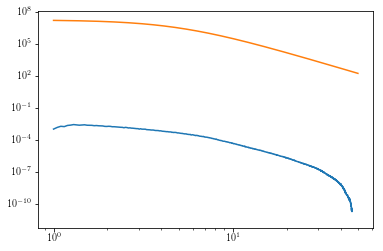

In [10]:
loglog(r_profiles, np.abs(density_plum))
loglog(r_profiles, teo_plummer)

In [11]:
weights_hern, w_ids = weights.weight_triaxial(rr,Ekk,Epp,ids,partmass,0.01, 50, 1E10, 'Hernquist', [5])
density_hern = tracers_properties.den_tracers(weights_hern, ids, w_ids, rr, massarr, 1000)

/home/ngaravito/work/github/tracers_triaxial/src/weights.py:151: RuntimeWarning: divide by zero encountered in true_divide
  Weights=distribution_function[indsort[::-1]]/((Histo_M)/density_of_states)


-4.29320257636


/home/ngaravito/work/github/tracers_triaxial/src/tracers_properties.py:65: RuntimeWarning: divide by zero encountered in true_divide
  density = mass_bins/shells


In [15]:
teo_hern = soda.profiles.dens_plummer(5, r_profiles, 1E10)

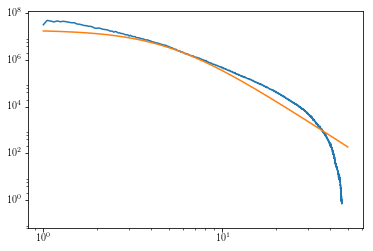

In [16]:
loglog(r_profiles, np.abs(density_hern))
loglog(r_profiles, teo_hern)